In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from assocplots.qqplot import *
import pickle

In [2]:
snp_df = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Nerve_Tibial/gene-snp_eqtls_empiricalpvalues_allchr', sep='\t')

In [3]:
snp_df

,snp,cpma,pvalue
0,chr1_100007048,175.076413,0.722275
1,chr1_100110377,179.462116,0.718867
2,chr1_100133310,240.862862,0.676731
3,chr1_100133311,240.862862,0.676731
4,chr1_100206504,392.056652,0.593199
...,...,...,...
31961,chr22_50606762,138.655291,0.776340
31962,chr22_50625611,211.999535,0.725075
31963,chr22_50626933,294.377515,0.678135
31964,chr22_50679152,56.247171,0.856474


In [6]:
conseq_path = '/storage/cynthiawu/trans_eQTL/GTex.v8/VariantConseq/GTEx_Analysis_2017-06-05_v8_WholeGenomeSeq_variant_effect.pkl'
with open(conseq_path, 'rb') as f:
    conseq_dict = pickle.load(f)

In [7]:
conseq_dict

{'chr1:10144': 'downstream_gene_variant',
 'chr1:10177': 'downstream_gene_variant',
 'chr1:10180': 'downstream_gene_variant',
 'chr1:10181': 'downstream_gene_variant',
 'chr1:10228': 'downstream_gene_variant',
 'chr1:10250': 'downstream_gene_variant',
 'chr1:10257': 'downstream_gene_variant',
 'chr1:10291': 'downstream_gene_variant',
 'chr1:10297': 'downstream_gene_variant',
 'chr1:10303': 'downstream_gene_variant',
 'chr1:10321': 'downstream_gene_variant',
 'chr1:10327': 'downstream_gene_variant',
 'chr1:10328': 'downstream_gene_variant',
 'chr1:10329': 'downstream_gene_variant',
 'chr1:10330': 'downstream_gene_variant',
 'chr1:10334': 'downstream_gene_variant',
 'chr1:10340': 'downstream_gene_variant',
 'chr1:10346': 'downstream_gene_variant',
 'chr1:10352': 'downstream_gene_variant',
 'chr1:10354': 'downstream_gene_variant',
 'chr1:10419': 'downstream_gene_variant',
 'chr1:10423': 'downstream_gene_variant',
 'chr1:10432': 'downstream_gene_variant',
 'chr1:10437': 'downstream_gene_va

In [25]:
conseq = []
num_snps = len(snp_df)
for index, row in snp_df.iterrows():
    query = row[0].replace('_', ':')
    conseq.append(conseq_dict.get(query, 'NA'))

In [28]:
snp_df['conseq'] = conseq

In [30]:
conseq_dict['chr1:100133310']

'missense_variant,NMD_transcript_variant'

In [29]:
snp_df

,snp,cpma,pvalue,conseq
0,chr1_100007048,175.076413,0.722275,intron_variant
1,chr1_100110377,179.462116,0.718867,non_coding_transcript_exon_variant
2,chr1_100133310,240.862862,0.676731,"missense_variant,NMD_transcript_variant"
3,chr1_100133311,240.862862,0.676731,"missense_variant,NMD_transcript_variant"
4,chr1_100206504,392.056652,0.593199,missense_variant
...,...,...,...,...
31961,chr22_50606762,138.655291,0.776340,synonymous_variant
31962,chr22_50625611,211.999535,0.725075,upstream_gene_variant
31963,chr22_50626933,294.377515,0.678135,upstream_gene_variant
31964,chr22_50679152,56.247171,0.856474,"missense_variant,NMD_transcript_variant"


In [34]:
missense = snp_df[snp_df['conseq'].str.contains('missense_variant')]
synonymous = snp_df[snp_df['conseq'].str.contains('synonymous_variant')]

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/assocplots/qqplot.py:60: RuntimeWarning: invalid value encountered in less
  q_err[i, q_err[i, :] < 0] = 1e-15
/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/assocplots/qqplot.py:69: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j])
/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/assocplots/qqplot.py:75: RuntimeWarning: divide by zero encountered in log10
  plt.fill_between(-np.log10(q_th), -np.log10(q_data/q_th*q_err[:,0]), -np.log10(q_data/q_th*q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)
/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/assocplots/qqplot.py:75: RuntimeWarning: divide by zero encountered in true_divide
  plt.fill_between(-np.log10(q_th), -np.log10(q_data/q_th*q_err[:,0]), -np.log10(

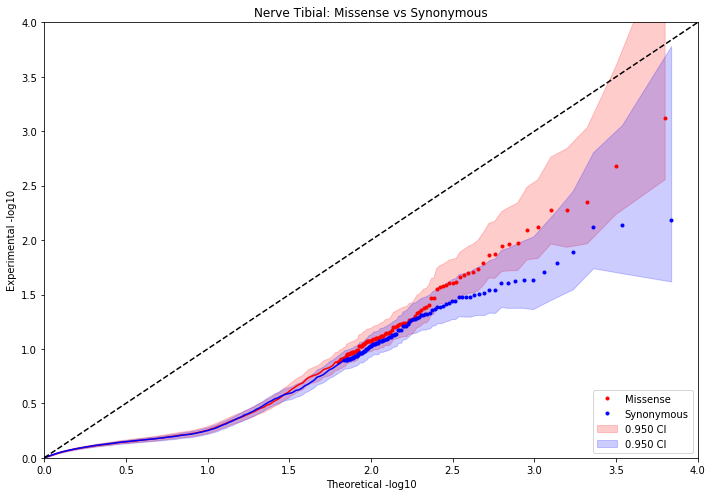

In [37]:
plt.figure(figsize=(10,7))
pvalues = [list(missense['pvalue']), list(synonymous['pvalue'])]
legend = ['Missense', 'Synonymous']
qqplot(pvalues, legend, error_type='experimental', color=['r', 'b'], fill_dens=[0.2, 0.2], distribution='beta', title='Nerve Tibial: Missense vs Synonymous')

In [ ]:
plt.figure(figsize=(10,7))
pvalues_a = [list(missense_a['pvalue']), list(synonymous_a['pvalue']), list(frameshift_a['pvalue']), list(stop_a['pvalue']), list(splice_a['pvalue']), list(utr_a['pvalue'])]
legend_a = ['Missense', 'Synonymous', 'Frameshift', 'Stop', 'Splice', 'UTR']
qqplot(pvalues_a, legend_a, error_type='experimental', color=['r', 'b', 'g', 'k', 'y', 'c'], fill_dens=[0.2, 0.2, 0.2, 0.2, 0.2, 0.2], distribution='beta', title='')

In [31]:
snp_df[snp_df['conseq'].str.contains('missense_variant')]

,snp,cpma,pvalue,conseq
2,chr1_100133310,240.862862,0.676731,"missense_variant,NMD_transcript_variant"
3,chr1_100133311,240.862862,0.676731,"missense_variant,NMD_transcript_variant"
4,chr1_100206504,392.056652,0.593199,missense_variant
5,chr1_100484304,179.460522,0.718867,"missense_variant,NMD_transcript_variant"
6,chr1_100539534,2.509463,0.965886,missense_variant
...,...,...,...,...
31935,chr22_50439767,1850.478687,0.290985,missense_variant
31953,chr22_50547274,305.945676,0.672151,missense_variant
31955,chr22_50548858,42.528216,0.875050,missense_variant
31957,chr22_50549764,232.685136,0.712417,missense_variant


In [32]:
snp_df.loc[snp_df['conseq'] == 'missense_variant']

,snp,cpma,pvalue,conseq
4,chr1_100206504,392.056652,0.593199,missense_variant
6,chr1_100539534,2.509463,0.965886,missense_variant
8,chr1_1014228,176.232881,0.721449,missense_variant
36,chr1_1071842,402.678947,0.588111,missense_variant
37,chr1_1072052,111.911694,0.776392,missense_variant
...,...,...,...,...
31910,chr22_50201536,1567.183664,0.332097,missense_variant
31935,chr22_50439767,1850.478687,0.290985,missense_variant
31953,chr22_50547274,305.945676,0.672151,missense_variant
31955,chr22_50548858,42.528216,0.875050,missense_variant


In [ ]:
missense_a = empirical_conseq_a.loc[empirical_conseq_a['INFO'] == 'missense_variant']
synonymous_a = empirical_conseq_a.loc[empirical_conseq_a['INFO'] == 'synonymous_variant']
frameshift_a = empirical_conseq_a.loc[empirical_conseq_a['INFO'].isin(['frameshift_variant', 'frameshift_variant&NMD_transcript_variant', 'frameshift_variant&splice_region_variant','frameshift_variant&stop_lost','frameshift_variant&stop_retained_variant'])]
stop_a = empirical_conseq_a.loc[empirical_conseq_a['INFO'].isin(['stop_gained', 'stop_gained&NMD_transcript_variant', 'stop_gained&splice_region_variant', 'stop_lost', 'stop_retained_variant'])]
splice_a = empirical_conseq_a.loc[empirical_conseq_a['INFO'].isin(['splice_acceptor_variant','splice_acceptor_variant&coding_sequence_variant&intron_variant','splice_acceptor_variant&intron_variant','splice_donor_variant','splice_donor_variant&coding_sequence_variant&intron_variant','splice_donor_variant&intron_variant','splice_donor_variant&non_coding_transcript_variant','splice_region_variant&3_prime_UTR_variant','splice_region_variant&3_prime_UTR_variant&NMD_transcript_variant','splice_region_variant&5_prime_UTR_variant','splice_region_variant&intron_variant','splice_region_variant&intron_variant&NMD_transcript_variant','splice_region_variant&intron_variant&non_coding_transcript_variant','splice_region_variant&non_coding_transcript_exon_variant&non_coding_transcript_variant','splice_region_variant&synonymous_variant','splice_region_variant&synonymous_variant&NMD_transcript_variant'])]
utr_a = empirical_conseq_a.loc[empirical_conseq_a['INFO'].isin(['3_prime_UTR_variant','3_prime_UTR_variant&NMD_transcript_variant','5_prime_UTR_variant','5_prime_UTR_variant&NMD_transcript_variant'])]

In [22]:
value = conseq_dict.get('chr5:94386345', 'NA')

In [23]:
value

'NA'

In [9]:
conseq

['intron_variant']

In [11]:
conseq_dict['chr1:100007048']

'intron_variant'

In [15]:
0.05/len(snp_df)

1.5641619220421699e-06

In [14]:
pvalues_adj

[2.259508713792433e-05]

In [19]:
(snp_df['pvalue'] <= (0.05/len(snp_df))).value_counts()

False    31966
Name: pvalue, dtype: int64

In [20]:
(snp_df['pvalue'] <= (0.05)).value_counts()

False    31810
True       156
Name: pvalue, dtype: int64